In [2]:
# prerequisites 
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd

In [2]:
def readDatas(dataPath: str):
    return pd.read_csv(dataPath,delimiter=',', header='infer')

In [3]:
def plotDataDistribution(df_world_happiness):
    fig,axes = plt.subplots(nrows=2,figsize=(15,15))

    axes[0].hist(df_world_happiness["Happiness.Score"])
    axes[0].set_title("Happiness")

    axes[1].hist(df_world_happiness["Economy..GDP.per.Capita."])
    axes[1].set_title("PIB")
    plt.show()

In [4]:
def plotData(df_world_happiness):
    fig,axes = plt.subplots()

    axes.plot(df_world_happiness["Economy..GDP.per.Capita."],df_world_happiness["Happiness.Score"], 'ro') 
    axes.set_xlabel('GDP')
    axes.set_ylabel('Happiness')
    axes.set_title('Relation between GDP and Happiness')
    plt.show()

In [5]:
def getTrainingAndValidationSets(df_world_happiness):
    dataSize = df_world_happiness.shape[0]
    trainingIndexSet = np.random.choice(range(dataSize),size=int(0.8 * dataSize),replace=False)
    validationIndexSet = [i for i in range(dataSize) if i not in trainingIndexSet] 

    trainingInputSet = [df_world_happiness["Economy..GDP.per.Capita."].iloc[index] for index in trainingIndexSet ]
    trainingOutputSet = [df_world_happiness["Happiness.Score"].iloc[index] for index in trainingIndexSet ]

    validationInputSet = [df_world_happiness["Economy..GDP.per.Capita."].iloc[index] for index in validationIndexSet ]
    validationOutputSet = [df_world_happiness["Happiness.Score"].iloc[index] for index in validationIndexSet ]
    
    return trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet

def plotTrainingAndValidationDatas(df_world_happiness):
    trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet = getTrainingAndValidationSets(df_world_happiness)
    fig, axes = plt.subplots()

    plt.plot(trainingInputSet, trainingOutputSet, 'ro', label = 'training data')   #train data are plotted by red and circle sign
    plt.plot(validationInputSet, validationOutputSet, 'g^', label = 'validation data')     #test data are plotted by green and a triangle sign
    axes.set_title("train and validation data")
    axes.set_xlabel('GDP')
    axes.set_ylabel('happiness')
    plt.legend()
    plt.show()

In [6]:
def getRegressor(df_world_happiness):
    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSets(df_world_happiness)
    xx = [[el] for el in trainingInputSet]

    regressor = linear_model.LinearRegression()
    regressor.fit(xx, trainingOutputSet)

    return regressor


In [7]:
def plotRegressor(df_world_happiness):

    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSets(df_world_happiness)
    regressor = getRegressor(df_world_happiness)
    w0, w1 = regressor.intercept_, regressor.coef_[0]
    noOfPoints = 1000
    xref = []
    val = min(trainingInputSet)
    step = (max(trainingInputSet) - min(trainingInputSet)) / noOfPoints
    for i in range(1, noOfPoints):
        xref.append(val)
        val += step
    yref = [w0 + w1 * el for el in xref] 

    fix,axes = plt.subplots()

    axes.plot(trainingInputSet, trainingOutputSet, 'ro', label = 'training data')  #train data are plotted by red and circle sign
    axes.plot(xref, yref, 'b-', label = 'learnt model')                  #model is plotted by a blue line
    axes.set_title('train data and the learnt model')
    axes.set_xlabel('GDP')
    axes.set_ylabel('happiness')
    axes.legend()
    plt.show()


In [8]:
from sklearn.metrics import mean_squared_error

def getErrors(df_world_happiness):
    _,_,validationInputSet, validationOutputSet = getTrainingAndValidationSets(df_world_happiness)
    regressor = getRegressor(df_world_happiness)
    computedValidationOutputs = regressor.predict([[x] for x in validationInputSet])
    manualError = 0.0
    for t1, t2 in zip(computedValidationOutputs, validationOutputSet):
        manualError += (t1 - t2) ** 2
    manualError = manualError / len(validationOutputSet)
    computedError = mean_squared_error(validationOutputSet, computedValidationOutputs)
    return manualError, computedError


## Problema 1

In [9]:
world_happiness = readDatas("datas/v1_world-happiness-report-2017.csv")

world_happiness = world_happiness.dropna()

<h3>Distributia Datelor</h3>

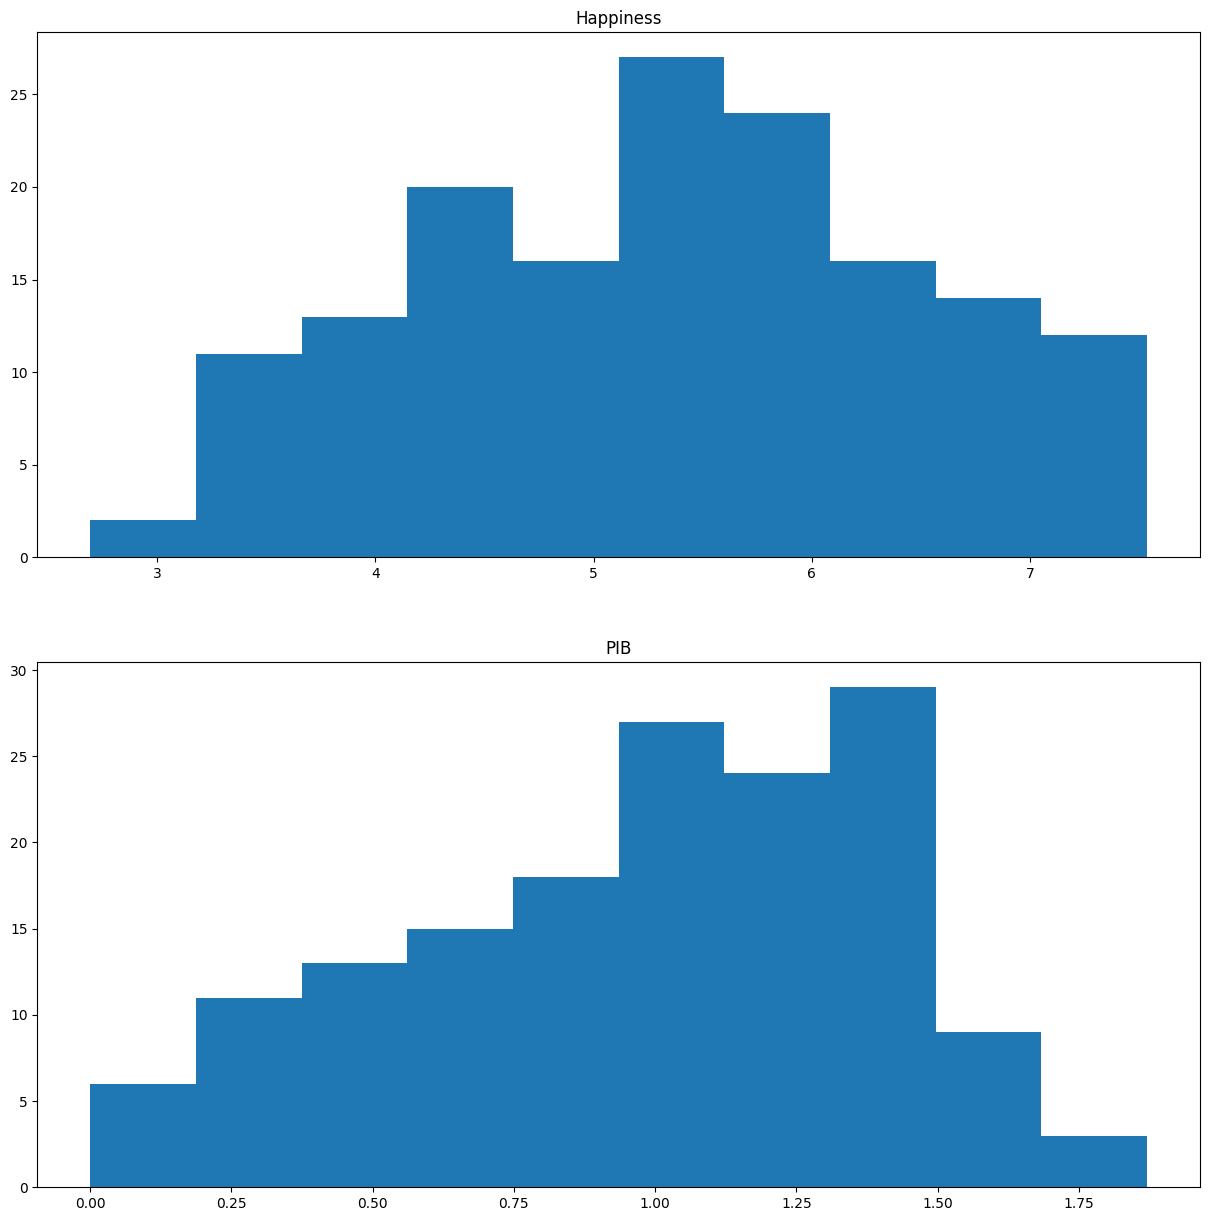

In [10]:
plotDataDistribution(world_happiness)

<h3>Plot</h3>

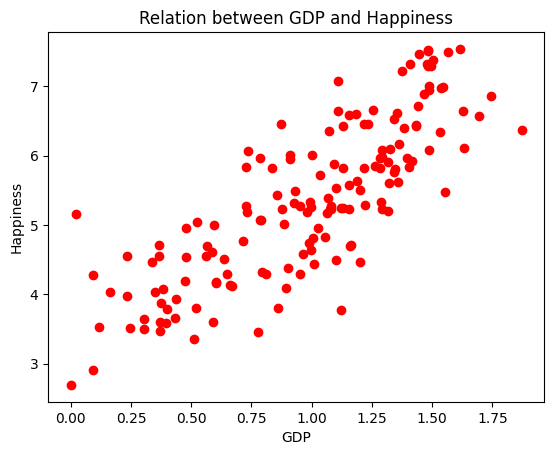

In [11]:
plotData(world_happiness)

<h3>Impartim setul de date intre set de antrenament si set de testare</h3>

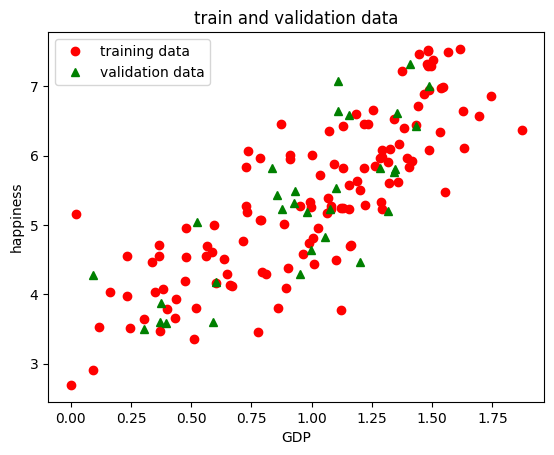

In [12]:
plotTrainingAndValidationDatas(world_happiness)

In [13]:
regressor = getRegressor(world_happiness)
w0, w1 = regressor.intercept_, regressor.coef_[0]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

the learnt model: f(x) =  3.0553136573803004  +  2.308011604941391  * x


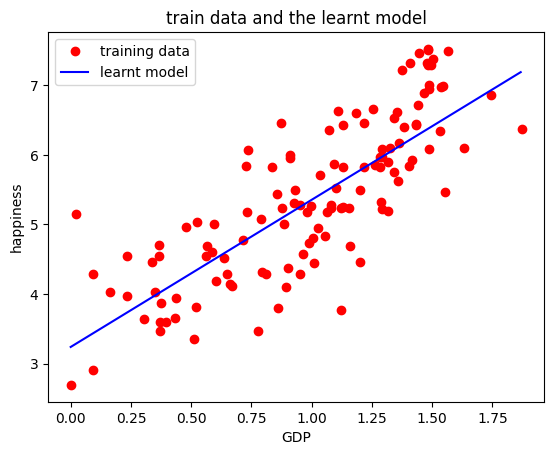

In [14]:
plotRegressor(world_happiness)

In [15]:
mErr, cErr = getErrors(world_happiness)
print("Manual error: {}\nComputed error: {}".format(mErr, cErr))

Manual error: 0.4605224571160604
Computed error: 0.4605224571160604


## Problema 2

In [16]:
world_happiness = readDatas("datas/v2_world-happiness-report-2017.csv")

world_happiness = world_happiness.dropna()

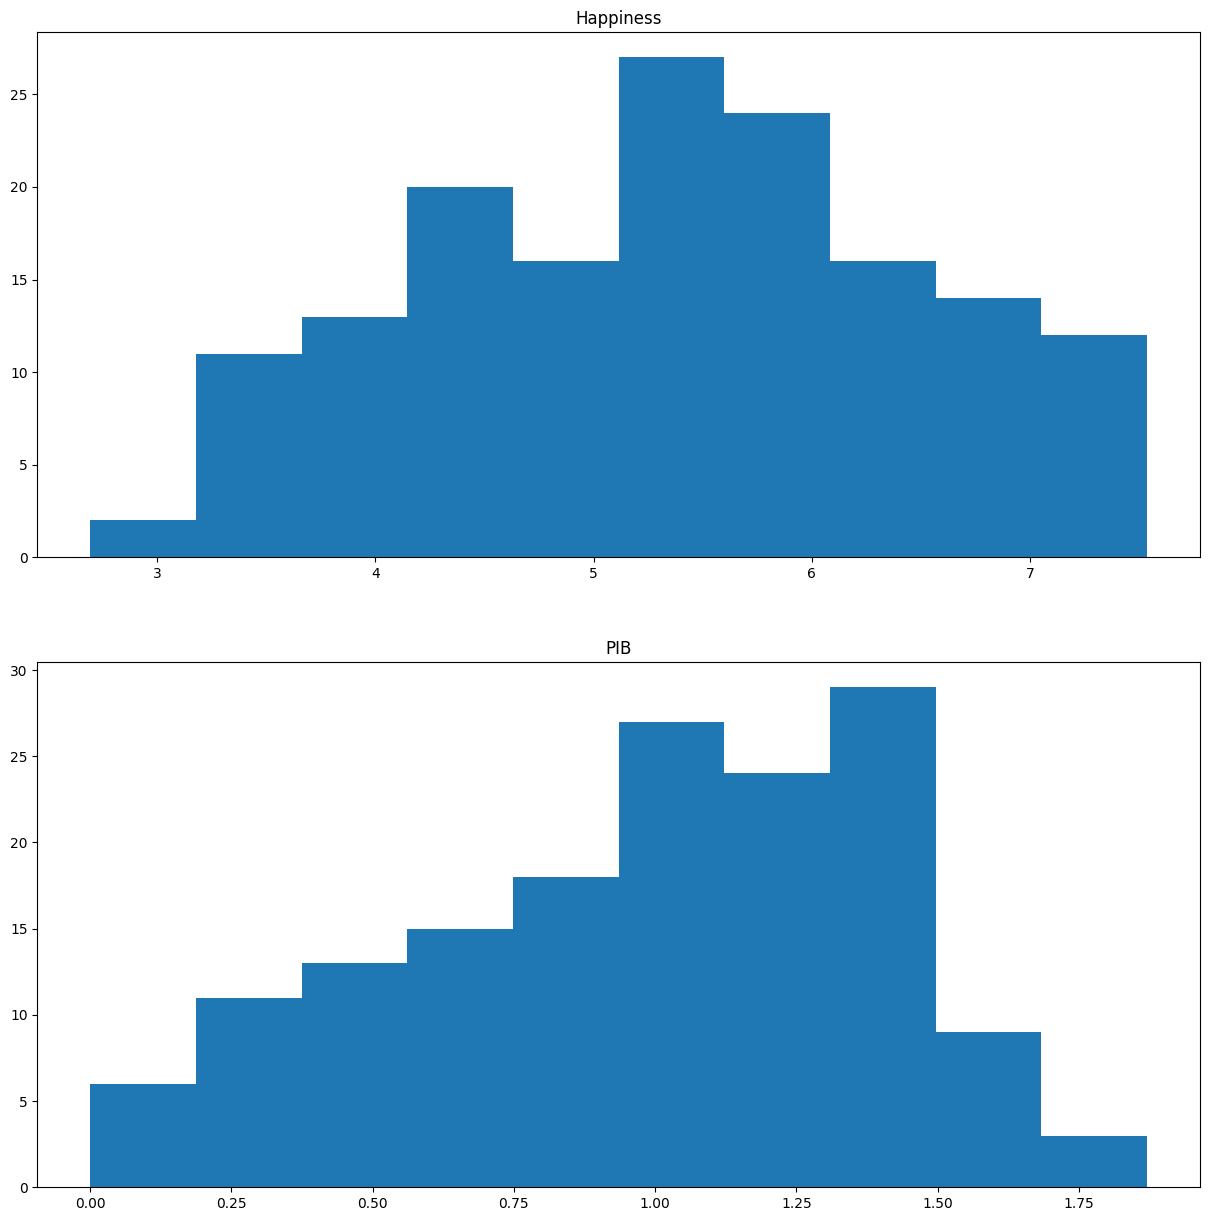

In [17]:
plotDataDistribution(world_happiness)

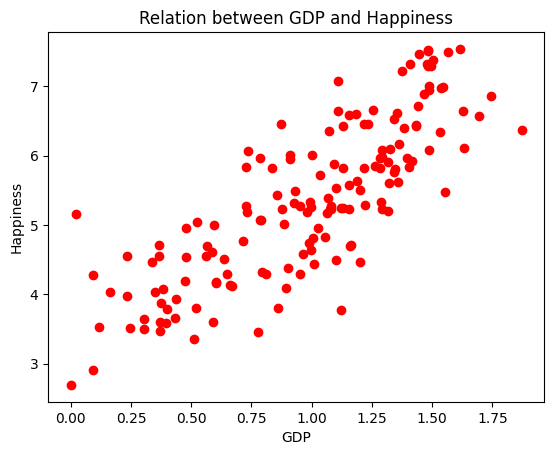

In [18]:
plotData(world_happiness)

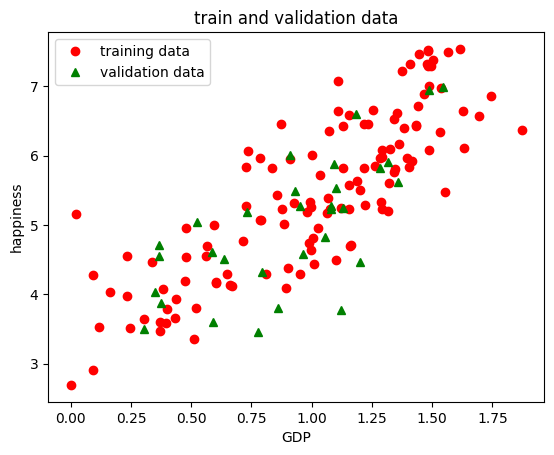

In [19]:
plotTrainingAndValidationDatas(world_happiness)

In [20]:
regressor = getRegressor(world_happiness)
w0, w1 = regressor.intercept_, regressor.coef_[0]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

the learnt model: f(x) =  3.1547801032133673  +  2.178443919113304  * x


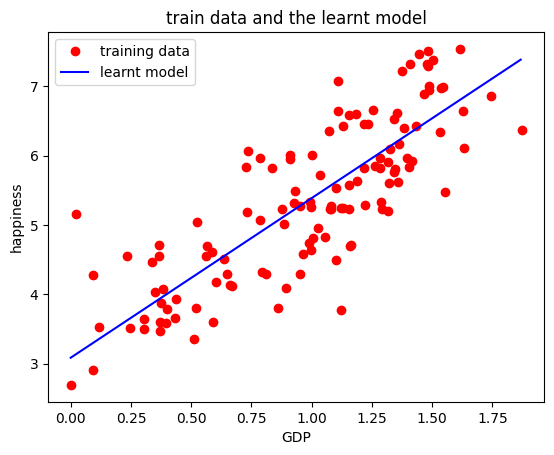

In [21]:
plotRegressor(world_happiness)

In [22]:
mErr, cErr = getErrors(world_happiness)
print("Manual error: {}\nComputed error: {}".format(mErr, cErr))

Manual error: 0.5008396406911677
Computed error: 0.5008396406911678


## Problema 3

In [23]:
world_happiness = readDatas("datas/v3_world-happiness-report-2017.csv")

world_happiness = world_happiness.dropna()

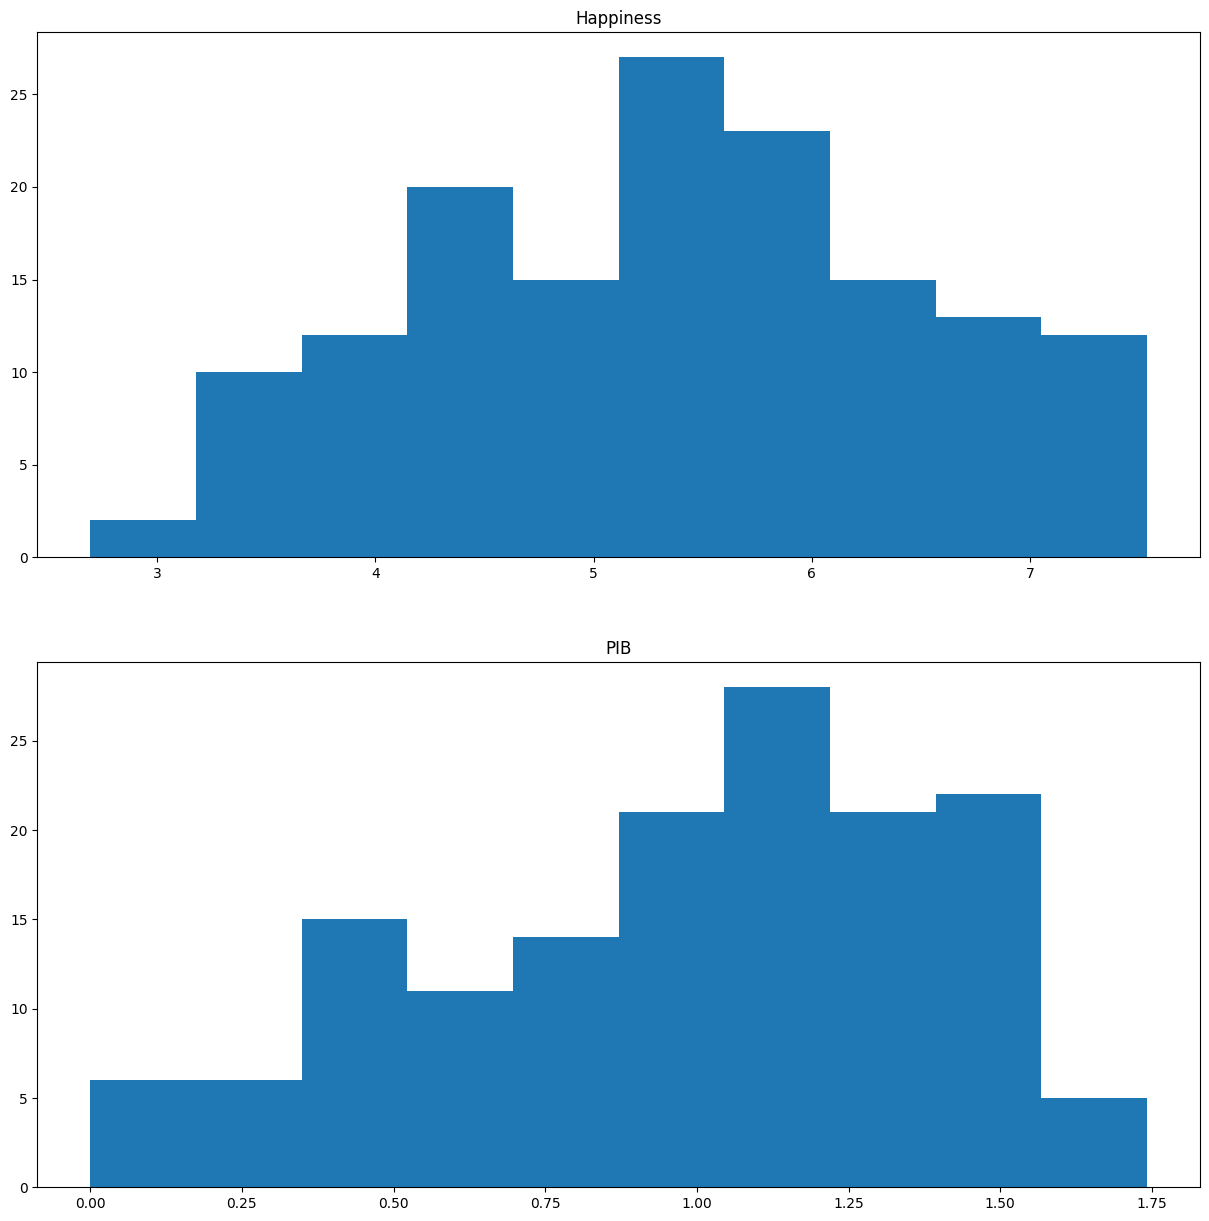

In [24]:
plotDataDistribution(world_happiness)

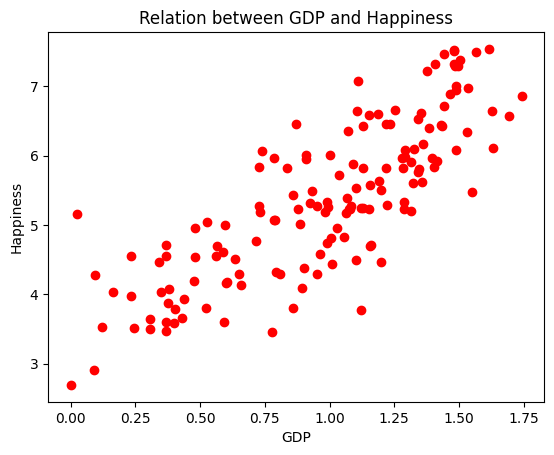

In [25]:
plotData(world_happiness)

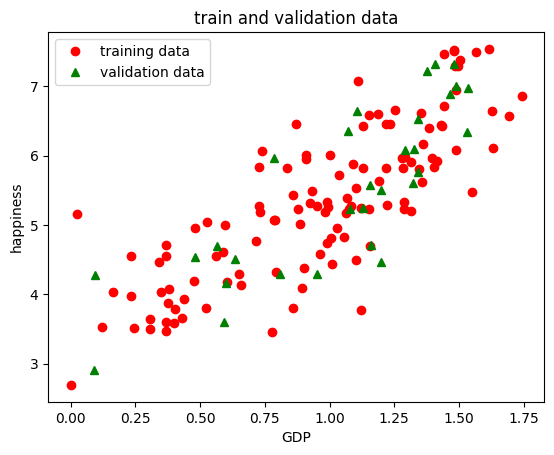

In [26]:
plotTrainingAndValidationDatas(world_happiness)

In [27]:
regressor = getRegressor(world_happiness)
w0, w1 = regressor.intercept_, regressor.coef_[0]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

the learnt model: f(x) =  3.3202751332747416  +  2.1442385171896388  * x


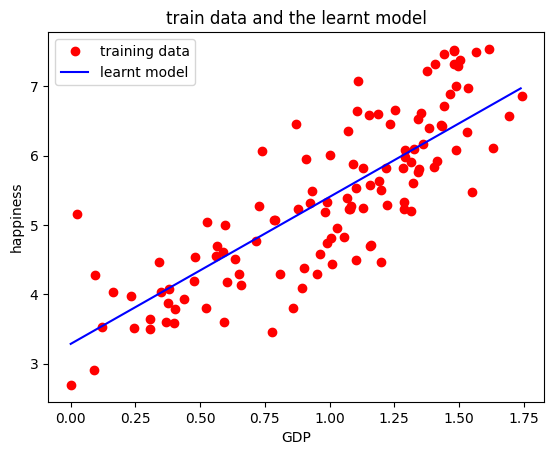

In [28]:
plotRegressor(world_happiness)

In [29]:
mErr, cErr = getErrors(world_happiness)
print("Manual error: {}\nComputed error: {}".format(mErr, cErr))

Manual error: 0.4505604149475428
Computed error: 0.45056041494754273
